In [286]:
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
import pint
# plt.style.use('science')

In [287]:
# add utility
import sys
sys.path.append('/home/john/SchoolCode/utility')
from utility import plots
plots.set_style()

In [288]:
ureg = pint.UnitRegistry()

In [289]:
theta_i = 20 * ureg.deg
n_i = 1.00
n_t = 1.55
theta_t = np.arcsin(n_i / n_t * np.sin(theta_i)).to(ureg.deg)
f"{theta_t:.2f}"

'12.75 degree'

In [290]:
r_p = (n_i * np.cos(theta_t) - n_t * np.cos(theta_i)) / (n_i * np.cos(theta_t) + n_t * np.cos(theta_i))
r_s = (n_i * np.cos(theta_i) - n_t * np.cos(theta_t)) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
f"r_p = {r_p:.3f}, r_s = {r_s:.3f}"

'r_p = -0.198 dimensionless, r_s = -0.233 dimensionless'

In [291]:
E_i_p = 10 * ureg.V/ureg.meter
E_i_s = 20 * ureg.V/ureg.meter

In [292]:
E_r_p = r_p * E_i_p
E_r_s = r_s * E_i_s
f"E_r_p = {E_r_p:.2f}, E_r_s = {E_r_s:.2f}"

'E_r_p = -1.98 volt / meter, E_r_s = -4.67 volt / meter'

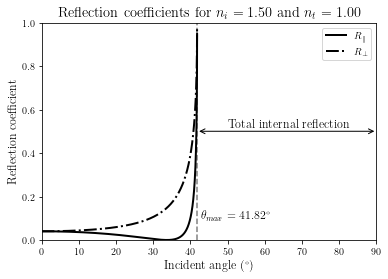

In [293]:
#2
def r_parallel(n_i, n_t, theta_i):
    theta_t = np.arcsin(n_i / n_t * np.sin(theta_i))
    r_p = (n_t * np.cos(theta_i) - n_i * np.cos(theta_t)) / (n_i * np.cos(theta_t) + n_t * np.cos(theta_i))
    return r_p**2

def r_perp(n_i, n_t, theta_i):
    theta_t = np.arcsin(n_i / n_t * np.sin(theta_i))
    r_s = (n_i * np.cos(theta_i) - n_t * np.cos(theta_t)) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
    return r_s**2

theta_i = np.linspace(0, 90, 10000) * ureg.deg

n_t = 1.00
n_i = 1.50
r_parallel = r_parallel(n_i, n_t, theta_i)
r_perp = r_perp(n_i, n_t, theta_i)

# plot
fig, ax = plt.subplots()

# draw vertical line at max angle
r_parallel_max = theta_i[np.argmax(r_parallel)]
ax.axvline(r_parallel_max.magnitude, color='grey', linestyle='--')
# attach text to line, specifing max angle
ax.text(r_parallel_max.magnitude + 1, 0.1, f'$\\theta_{{max}} = {r_parallel_max.magnitude:.2f}^\circ$', fontsize=12)

# arrow across space from max angle to 90
ax.annotate('', xy=(r_parallel_max.magnitude, 0.5), xytext=(90, 0.5), arrowprops=dict(arrowstyle='<->'))
# add text
ax.text(50, 0.52, 'Total internal reflection', fontsize=12)

ax.plot(theta_i, r_parallel, label='$R_\parallel$', linewidth=2, linestyle='-', color = "black")
ax.plot(theta_i, r_perp, label='$R_\perp$', linewidth=2, linestyle='-.', color = "black")

ax.set_xlabel('Incident angle ($^\circ$)')
ax.set_ylabel('Reflection coefficient')

ax.set_xlim(0, 90)

ax.set_title('Reflection coefficients for $n_i = 1.50$ and $n_t = 1.00$')

ax.set_ylim(0, 1)

ax.legend()

plt.savefig('reflection_coefficients.pdf', dpi=300)